# 如何获取NBA数据
- Stats.nba提供的api来抓取数据
- pip install nbashots来获取数据

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nbashots as nba # this will throw a warning if using matplotlib 1.5

%matplotlib inline

/Users/stone20091652/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/stone20091652/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# 用nba-shots抓取NBA球员的player_id

In [13]:
curry_id = nba.get_player_id("Curry, Stephen")[0]
curry_id

201939

库里的player_id是 201939

In [14]:

# 获取所有人的数据
players_with_shots = nba.get_all_player_ids("shots")
players_with_shots.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST
0,1505,"Abdul-Wahad, Tariq"
1,949,"Abdur-Rahim, Shareef"
2,101165,"Acker, Alex"
3,203112,"Acy, Quincy"
4,200801,"Adams, Hassan"


In [17]:
players_with_shots.shape

(1498, 2)

In [47]:
players_with_shots.PERSON_ID

0          1505
1           949
2        101165
3        203112
4        200801
5        203919
6        203500
7        202399
8        201167
9        200772
10       201336
11       201582
12       203006
13       202374
14       203128
15       202332
16       200746
17      1626146
18          724
19         2042
20       201570
21         2349
22       202730
23         2124
24          951
25         2754
26       200984
27       201165
28         1747
29          680
         ...   
1468       2106
1469     203489
1470    1626174
1471       2254
1472       2417
1473       1897
1474     101120
1475     101152
1476     201148
1477     202874
1478     203203
1479    1626153
1480       2748
1481     201153
1482        953
1483     203100
1484       2397
1485       2428
1486     201146
1487     203923
1488    1626202
1489     201156
1490     201970
1491     201152
1492     201180
1493     203469
1494     202545
1495     203092
1496       1917
1497       2583
Name: PERSON_ID, dtype: 

# 用官网提供的API抓取数据
## http://stats.nba.com/stats/playerprofile
LeagueID is required; PlayerID is required; Season is required; SeasonType is required; The GraphStartSeason property is required.; The GraphEndSeason property is required.; The GraphStat property is required.
## http://stats.nba.com/stats/shotchartdetail
SeasonType is required; TeamID is required; PlayerID is required; The GameID property is required.; The Outcome property is required.; The Location property is required.; Month is required; The SeasonSegment property is required.; The DateFrom property is required.; The DateTo property is required.; OpponentTeamID is required; The VsConference property is required.; The VsDivision property is required.; The Position property is required.; The RookieYear property is required.; The GameSegment property is required.; Period is required; LastNGames is required; The ContextMeasure property is required.
## shots的api格式
http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2014-15&AheadBehind=&PlayerID=201935&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID=

￥￥￥￥￥

In [4]:
from nba_py import player

In [11]:
pd = player.PlayerProfile('203507')


http://stats.nba.com/stats/playerprofilev2/?PlayerID=203507&LeagueID=00&PerMode=PerGame
    
用chrome打开这网站，用json的插件解析
![image](http://7xkeje.com1.z0.glb.clouddn.com/Screen%20Shot%202016-03-26%20at%2011.04.06%20PM.png)

G - Games Played

Min - Minutes Played

MPG - Minutes per Game

Pts - Total Points

PPG - Points per Game

FGM - Field Goals Made

FGA - Field Goals Attempted

FGP - Field Goal Percentage

FTM - Free Throws Made

FTA - Free Throws Attempted

FTP - Free Throw Percentage

3PM - Three Pointers Made*

3PA - Three Pointers Attempted*

3PP	- Three Point Percentage*

RPG - Rebounds per Game

AST - Total Assists

APG - Assists per Game

STL - Steals**

BLK - Blocks**

TO - Turnovers**

EFF - Efficiency***

AV - Approximate Value (see below)

PF - Total Personal Fouls

VI - Versatility Index (ppg*rpg*apg)^.333 (see below)

PPFGA - Points per FGA   Points/(FGA+(FTA*.44)) (see below)

PPR - Assist/Turnover Rating   (((ASTS*.66)-TO)*100)/Minutes (see below)

RbRate - Rebound Rate   (Reb*Team Minutes)/(Player Minutes*(Team Reb + Opp Reb)) (see below)

### Header上简写字母的具体说明

In [35]:
playerprofile_url = 'http://stats.nba.com/stats/playerprofilev2/?PlayerID=203507&LeagueID=00&PerMode=PerGame'

In [36]:
response = requests.get(playerprofile_url,headers={'User-Agent':'test'})

In [38]:
response

<Response [200]>

In [41]:
headers = response.json()['resultSets'][0]['headers']

profile = response.json()['resultSets'][0]['rowSet']

In [44]:
profile_df = pd.DataFrame(shots, columns=headers)

from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(profile_df)

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203507,2013-14,00,1610612749,MIL,19,77,23,24.6,2.2,5.4,0.414,0.5,1.5,0.347,1.8,2.6,0.683,1.0,3.4,4.4,1.9,0.8,0.8,1.6,2.2,6.8
1,203507,2014-15,00,1610612749,MIL,20,81,71,31.4,4.7,9.6,0.491,0.1,0.5,0.159,3.2,4.3,0.741,1.2,5.5,6.7,2.6,0.9,1.0,2.1,3.1,12.7
2,203507,2015-16,00,1610612749,MIL,21,71,70,35.4,6.4,12.6,0.506,0.2,1.2,0.202,3.7,5.1,0.726,1.4,6.2,7.6,4.1,1.2,1.4,2.5,3.3,16.7


### player_id 是203507的选手打球三个赛季

In [61]:
import pandas as pd
import numpy as np

nba = pd.read_csv("nba.csv")
nba.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,PF,25,SAC,49,24,678,87,149,...,0.745,51,94,145,20,21,18,20,87,223
1,2,Jordan Adams,SG,21,MEM,2,0,15,2,6,...,0.6,0,2,2,3,3,0,2,2,7
2,3,Steven Adams,C,22,OKC,70,70,1730,221,362,...,0.593,181,270,451,50,34,78,69,191,541


In [68]:
point_guards = nba[nba['Pos'] == 'PG']

In [70]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 591
Data columns (total 30 columns):
Rk        592 non-null object
Player    592 non-null object
Pos       592 non-null object
Age       592 non-null object
Tm        592 non-null object
G         592 non-null object
GS        592 non-null object
MP        592 non-null object
FG        592 non-null object
FGA       592 non-null object
FG%       589 non-null object
3P        592 non-null object
3PA       592 non-null object
3P%       532 non-null object
2P        592 non-null object
2PA       592 non-null object
2P%       583 non-null object
eFG%      589 non-null object
FT        592 non-null object
FTA       592 non-null object
FT%       568 non-null object
ORB       592 non-null object
DRB       592 non-null object
TRB       592 non-null object
AST       592 non-null object
STL       592 non-null object
BLK       592 non-null object
TOV       592 non-null object
PF        592 non-null object
PTS       592 non-null ob

In [84]:
point_guards['PTS'] = point_guards['PTS'].astype(float)



/Users/stone20091652/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [88]:
point_guards['G'] = point_guards['G'].astype(float)

/Users/stone20091652/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [89]:
point_guards['PPG'] = point_guards['PTS'] / point_guards['G']

/Users/stone20091652/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [90]:
point_guards['PPG']

25      1.200000
29      7.377358
30      4.176471
31     13.105263
36     10.045455
51      9.564516
56      4.183673
57     20.387097
68      7.118644
70      2.500000
77     10.730159
83      7.637681
85     10.859155
90     11.537037
93     10.295082
94      5.500000
95     10.818182
100    10.600000
101    13.567164
103    15.303571
106     1.333333
117     4.235294
118    30.173913
131     4.444444
132     7.160000
147     3.594595
149    15.160000
152    10.333333
155     9.253521
161     3.100000
         ...    
467    17.016949
469     1.709677
470    10.333333
474    13.114286
479    11.267606
484     9.527778
489     6.882353
490     9.254902
492    12.328358
493     8.851852
494    14.675000
501     1.533333
516     9.021277
519    15.014286
523    22.152778
541     4.659091
542     5.875000
543     4.388889
548     7.125000
557    21.070423
558    20.138889
560     4.240000
561     4.833333
566    23.611111
572    13.983871
574     1.600000
577     8.885714
584     2.0000

In [92]:
point_guards[['PTS', 'G', 'PPG']].head(5)


,PTS,G,PPG
25,6,5,1.200000
29,391,53,7.377358
30,142,34,4.176471
31,249,19,13.105263
36,663,66,10.045455


In [94]:
point_guards = point_guards[point_guards['TOV'] != 0]

In [95]:
point_guards

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG
25,23,Keith Appling,PG,23,ORL,5,0,27,2,8,...,0,1,1,1,1,0,3,5,6,1.200000
29,27,D.J. Augustin,PG,28,TOT,53,0,987,124,291,...,7,75,82,159,31,3,65,76,391,7.377358
30,27,D.J. Augustin,PG,28,OKC,34,0,519,46,121,...,5,38,43,66,13,2,30,41,142,4.176471
31,27,D.J. Augustin,PG,28,DEN,19,0,468,78,170,...,2,37,39,93,18,1,35,35,249,13.105263
36,32,J.J. Barea,PG,31,DAL,66,10,1441,258,591,...,23,103,126,259,20,2,97,100,663,10.045455
51,46,Patrick Beverley,PG,27,HOU,62,54,1760,216,508,...,60,151,211,187,82,23,83,203,593,9.564516
56,51,Steve Blake,PG,35,DET,49,0,818,76,198,...,8,62,70,159,19,4,73,64,205,4.183673
57,52,Eric Bledsoe,PG,26,PHO,31,31,1059,223,492,...,18,107,125,190,63,19,110,75,632,20.387097
68,62,Aaron Brooks,PG,31,CHI,59,0,944,159,415,...,18,76,94,152,25,9,68,116,420,7.118644
70,64,Lorenzo Brown,PG,25,PHO,8,0,61,8,25,...,0,7,7,11,3,1,9,4,20,2.500000


In [96]:
point_guards['AST'] = point_guards['AST'].astype(float)

In [98]:
point_guards['TOV'] = point_guards['TOV'].astype(float)

In [99]:
point_guards['ATR'] = point_guards['AST'] / point_guards['TOV']

In [100]:
point_guards['ATR']

25     0.333333
29     2.446154
30     2.200000
31     2.657143
36     2.670103
51     2.253012
56     2.178082
57     1.727273
68     2.235294
70     1.222222
77     1.825000
83     3.392857
85     1.465909
90     1.836601
93     2.072072
94     2.111111
95     2.068627
100    2.226667
101    2.373913
103    4.071429
106    0.600000
117    1.529412
118    2.045249
131    2.600000
132    2.511111
147    2.083333
149    2.246575
152    2.200000
155    2.450000
161    1.534884
         ...   
467    1.797468
469    2.357143
470    3.582822
474    1.448485
479    2.025316
484    1.956522
489    3.126761
490    2.253968
492    2.986207
493    3.422222
494    2.790000
501    1.571429
516    1.885246
519    2.118557
523    2.481283
541    2.188679
542    2.363636
543    2.142857
548    2.366667
557    2.456954
558    2.471186
560    3.736842
561    2.222222
566    2.465574
572    2.531469
574    4.000000
577    1.722222
584    1.857143
585    0.689655
587    1.964286
Name: ATR, dtype: float6

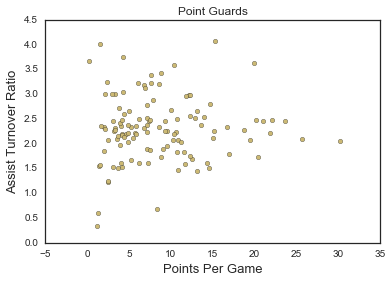

In [101]:
plt.scatter(point_guards['PPG'], point_guards['ATR'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

In [104]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.ix[random_initial_points]

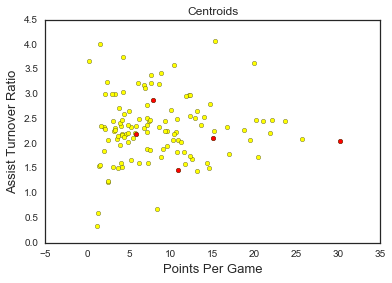

In [105]:
plt.scatter(point_guards['PPG'], point_guards['ATR'], c='yellow')
plt.scatter(centroids['PPG'], centroids['ATR'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

In [106]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['PPG'], row['ATR']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

In [107]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.2360679775


In [108]:
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['PPG'], row['ATR']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

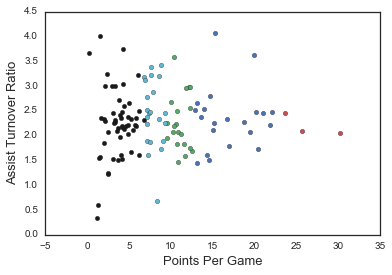

In [109]:
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['PPG'], clustered_df['ATR'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)

visualize_clusters(point_guards, 5)

In [111]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    # 0..1...2...3...4
    for cluster_id in range(0, num_clusters):
        # Finish the logic
        return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)
def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.average(values_in_cluster['PPG']), np.average(values_in_cluster['ATR'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

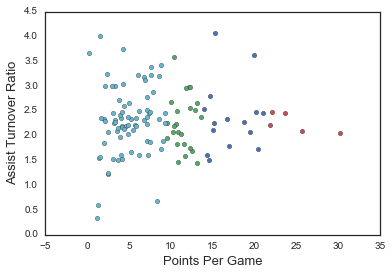

In [112]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

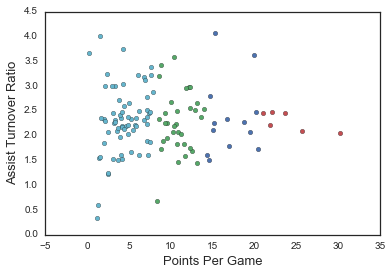

In [113]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

In [114]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['PPG', 'ATR']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').